# 데이터 분석
## iris 데이터셋
### 데이터 읽어와서 확인하기

#### 기본 정보

In [ ]:
import seaborn as sns
iris_df = sns.load_dataset('iris')
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### 기초 통계량

In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### 품종별 갯수

In [ ]:
species_counts = iris_df['species'].value_counts()
print(species_counts)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


### 데이터 전처리

#### 결측치 확인

In [ ]:
print(iris_df.isnull().sum())
print(iris_df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#### 중복값 확인

In [ ]:
print(iris_df[iris_df.duplicated()])

     sepal_length  sepal_width  petal_length  petal_width    species
142           5.8          2.7           5.1          1.9  virginica


#### 중복값 삭제


In [ ]:
iris_df_unique = iris_df.drop_duplicates()
print(iris_df_unique[iris_df_unique.duplicated()])

Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, species]
Index: []


### 데이터 그룹핑

In [ ]:
grouped_data = iris_df_unique.groupby('species')
sum_by_species = grouped_data.sum()
mean_by_species = grouped_data.mean()

print("품종별 합계:")
print(sum_by_species)

print("\n품종별 평균:")
print(mean_by_species)

품종별 합계:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          323.6        146.0         272.5         99.4

품종별 평균:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          5.006000     3.428000      1.462000     0.246000
versicolor      5.936000     2.770000      4.260000     1.326000
virginica       6.604082     2.979592      5.561224     2.028571


### 데이터 시각화

#### 막대 그래프

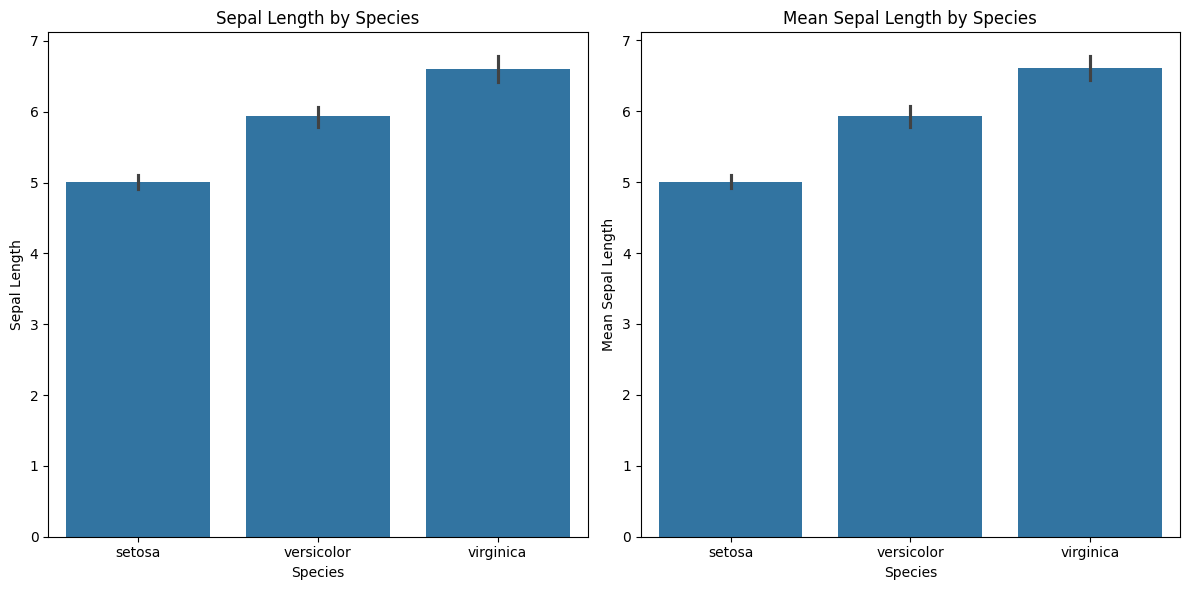

In [ ]:
import matplotlib.pyplot as plt
## make subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

## sepal length
sns.barplot(x='species', y='sepal_length', data=iris_df_unique, ax=axes[0])
axes[0].set_title('Sepal Length by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Length')

## mean (groupby species)
sns.barplot(x='species', y='sepal_length', data=iris_df_unique, estimator='mean', ax=axes[1])
axes[1].set_title('Mean Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Mean Sepal Length')

## layout
plt.tight_layout()
plt.show()

#### 히스토그램 그래프

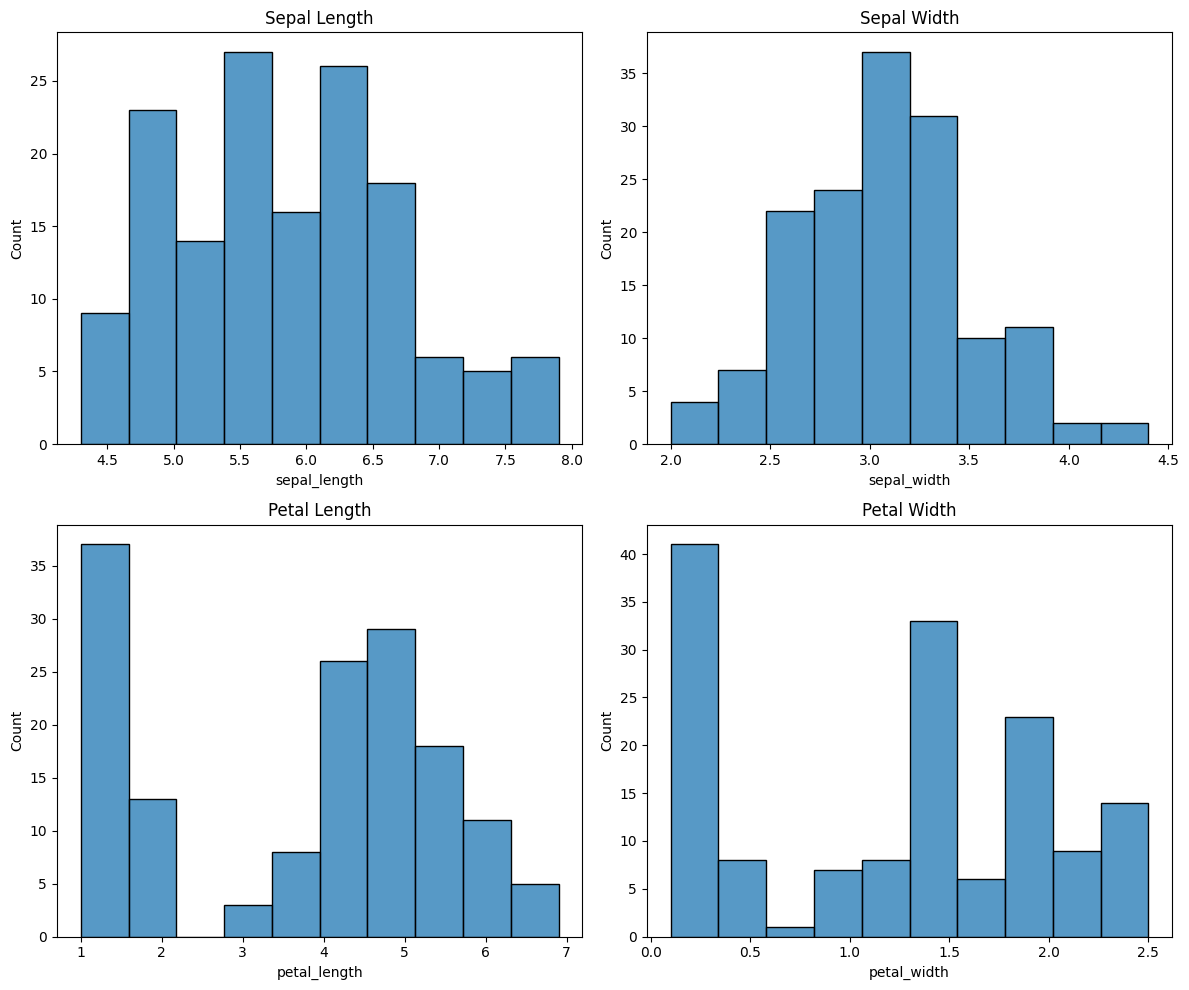

In [ ]:
## make subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

## make histogram
sns.histplot(data=iris_df, x='sepal_length', bins=10, ax=axes[0, 0])
sns.histplot(data=iris_df, x='sepal_width', bins=10, ax=axes[0, 1])
sns.histplot(data=iris_df, x='petal_length', bins=10, ax=axes[1, 0])
sns.histplot(data=iris_df, x='petal_width', bins=10, ax=axes[1, 1])

## title
axes[0, 0].set_title('Sepal Length')
axes[0, 1].set_title('Sepal Width')
axes[1, 0].set_title('Petal Length')
axes[1, 1].set_title('Petal Width')

## layout
plt.tight_layout()
plt.show()

#### 산점도 그래프

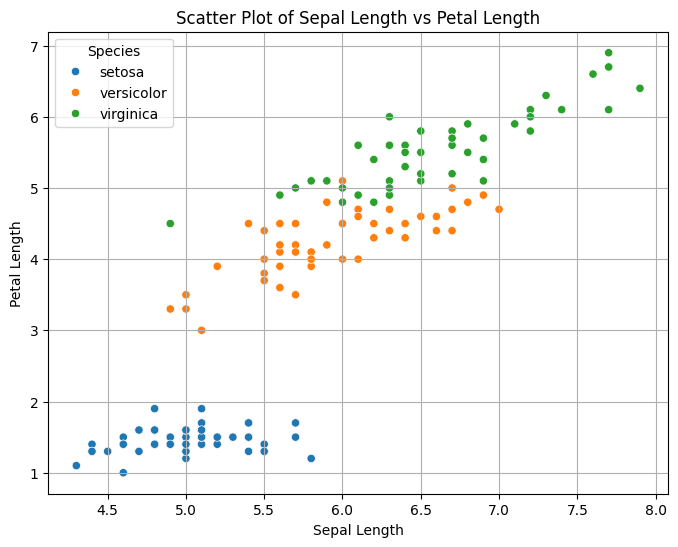

In [ ]:
ㄴplt.figure(figsize=(8, 6))
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length',
                hue='species')
plt.title('Scatter Plot of Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species')
plt.grid(True)
plt.show()